**Caso de Estudio: Análisis y Predicción de Datos de Empleados**

Se pidió desarrarollar el análisis y modelado sobre un dataset de empleados de una empresa; Este Dataset contiene información sobre educación, año de incorporación, ciudad de trabajo, categoría salarial, edad, género, si han sido asignados temporalmente a la banca (EverBenched), experiencia en dominio actual y el empleado tomó tiempo libre (LeaveOrNot). El dataset ha sido modificado por lo cual se debe incluir datos faltantes.




*   En esta primera parte se cargó el archivo csv a colab para realizar las tareas requeridas.



In [2]:
from google.colab import files
import pandas as pd

# Cargar el archivo CSV desde tu sistema local a Colab
uploaded = files.upload()

# Obtener la clave del primer archivo cargado (suponiendo que solo estás cargando un archivo)
file_key = list(uploaded.keys())[0]

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(file_key)

# Muestra las primeras filas del DataFrame para verificar que se haya cargado correctamente
df.head()

Saving EmployeesData.csv to EmployeesData.csv


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,0
1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,3.0,1
2,Bachelors,2014.0,New Delhi,3.0,38.0,Female,No,2.0,0
3,Masters,2016.0,Bangalore,3.0,27.0,Male,No,5.0,1
4,Masters,2017.0,Pune,3.0,24.0,Male,Yes,2.0,1




*   Se usa la libreria Pandas en python para leer el CSV llamado 'EmplyeesData.csv´ introducido en un DataFrame. se uso la función **pd.read_cvs()**



In [3]:
import pandas as pd

file_path = 'EmployeesData.csv'
df = pd.read_csv(file_path)



*  Verificación de datos faltantes



In [4]:
print(df.isnull().sum())

Education                     0
JoiningYear                  36
City                          0
PaymentTier                  42
Age                          27
Gender                        0
EverBenched                   0
ExperienceInCurrentDomain    30
LeaveOrNot                    0
dtype: int64




*   Se convierte la columna 'LeaveOrNot' de valores binarios (0 y 1) a las etiquetas categoricas **Leave** o **Not Leave**, donde **Leave** corresponde a 1 y **Not Leave** a 0.



In [5]:
df['LeaveOrNot'] = df['LeaveOrNot'].map({0: 'Not Leave', 1: 'Leave'})



*  Eliminación de filas con valores faltantes en 'ExperienceInCuerrentDomain', ´JoiningYear'



In [6]:
df = df.dropna(subset=['ExperienceInCurrentDomain', 'JoiningYear'])



*   Se imputan los datos faltante en Age con la media.



In [7]:
df['Age'].fillna(df['Age'].mean(), inplace=True)




*   Se imputa los datos faltantes en PaymentTier con la moda.



In [8]:
df['PaymentTier'].fillna(df['PaymentTier'].mode()[0], inplace=True)




*   Eliminación de registros con valores atípicos basándose en el análisis del IQR



In [9]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numeric_columns = ['ExperienceInCurrentDomain', 'JoiningYear', 'Age']
for column in numeric_columns:
    df = remove_outliers(df, column)


**ANALISIS EXPLORATORIO DE DATOS EDA**


*   Grafica de torta para representar la ditribucción de los sexos femeninos y masculinos


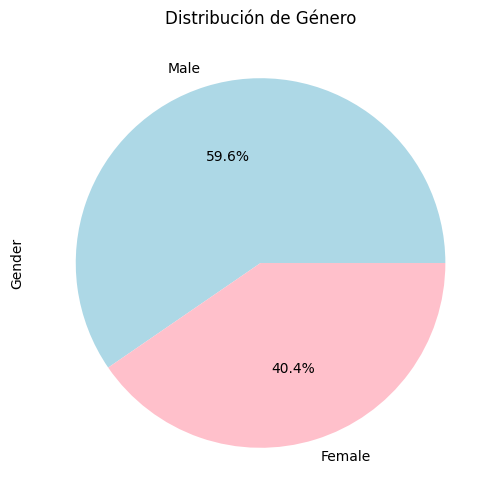

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Distribución de Género')
plt.show()


Gráfica de distrubución de niveles de estudio de los empleados; en es punto se hizo uso del histograma y torta.

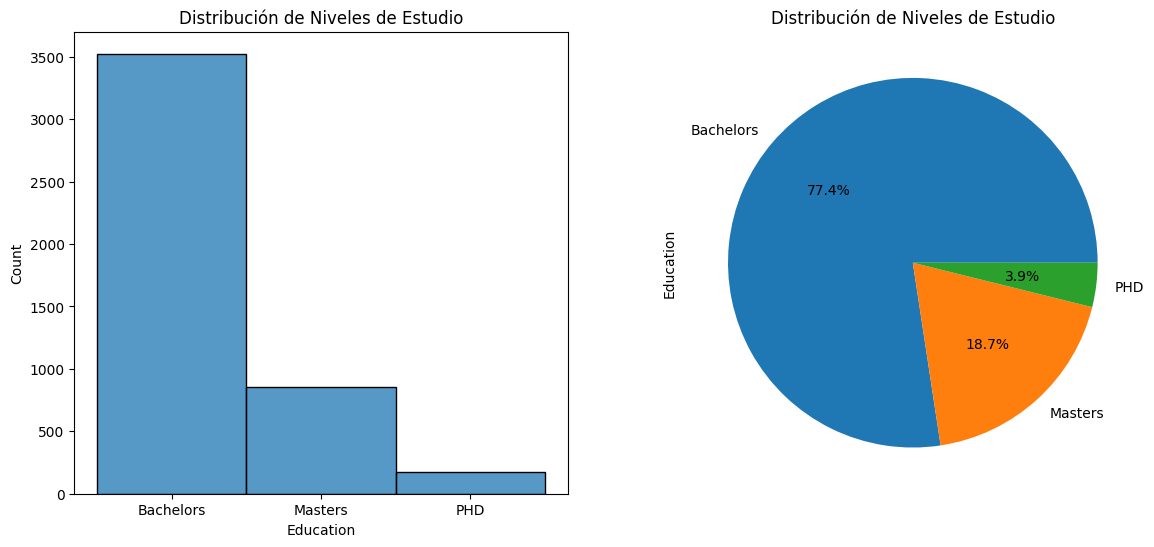

In [11]:
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histograma de niveles de estudio
sns.histplot(df['Education'], ax=axes[0], kde=False)
axes[0].set_title('Distribución de Niveles de Estudio')

# Gráfico de torta de niveles de estudio
df['Education'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Distribución de Niveles de Estudio')

plt.show()




*   Con base al siguiente histogram se buscaba dar respuesta a la pregunta ¿son los jóvenes más propensos a tomar licencias? Dando respuesta a la pregunta se pudo evidenciar que sí, las personas con menor edad son más propensos a tomar licencias, siendo veinteañeros con el pico más alto la edad entre los 25-26 años.


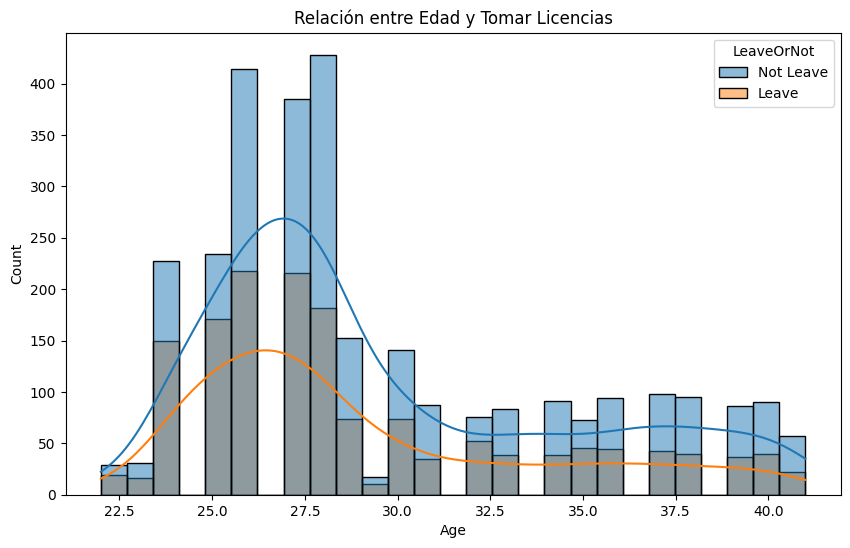

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='LeaveOrNot', data=df, kde=True)
plt.title('Relación entre Edad y Tomar Licencias')
plt.show()

**MODELADO DE DATOS**



*   Prepación de datos para el modelado




In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

# Eliminación de la columna objetivo del dataframe y sácala a otra variable para entrenar el modelo
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

# Conviersión a variables dummies todas las variables categóricas
X = pd.get_dummies(X)

# Se realiza una partición estratificada del dataset con train_test_split usando el argumento stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar dos RandomForests, uno sin cambios y otro usando el argumento class_weight="balanced"
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_balanced.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

*   Calculo métrico de desempeños para ambos modelos

RandomForest sin cambios:
Accuracy en entrenamiento: 0.9336
Accuracy en prueba: 0.8211
F1 Score en entrenamiento: 0.9326
F1 Score en prueba: 0.8164


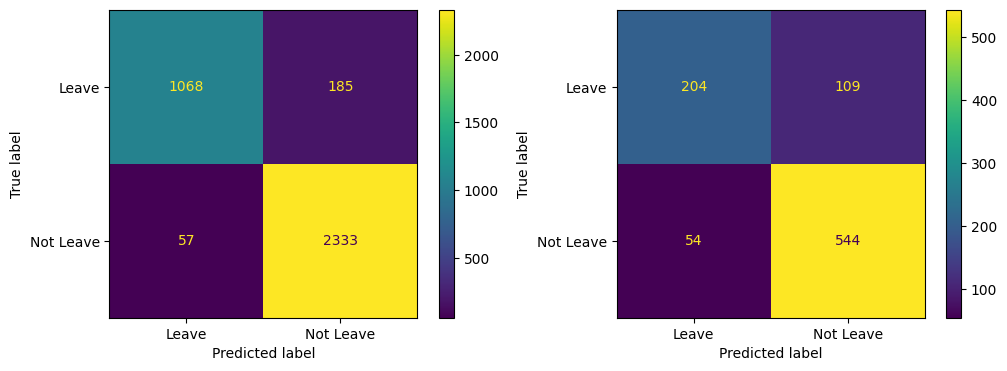

RandomForest con class_weight='balanced':
Accuracy en entrenamiento: 0.9322
Accuracy en prueba: 0.8233
F1 Score en entrenamiento: 0.9319
F1 Score en prueba: 0.8206


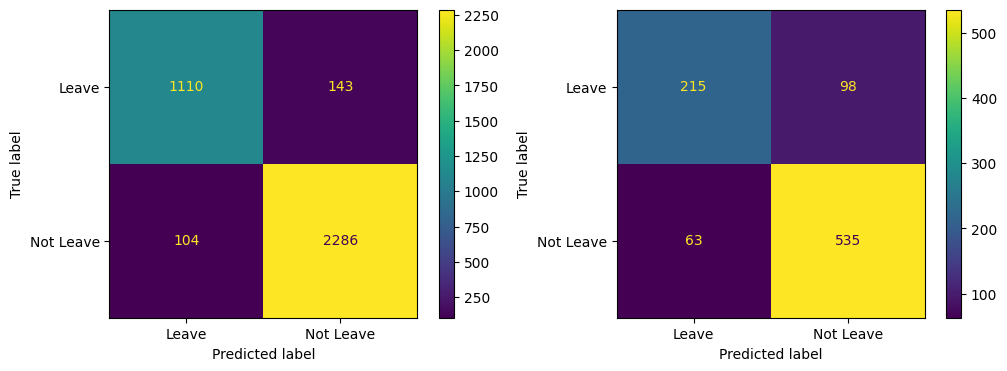

In [15]:
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    return train_accuracy, test_accuracy, train_f1, test_f1, cm_train, cm_test

# Métricas de desempeño para RandomForest sin cambios
train_accuracy, test_accuracy, train_f1, test_f1, cm_train, cm_test = calculate_metrics(rf_model, X_train, X_test, y_train, y_test)

# Mostrar métricas de desempeño para RandomForest sin cambios
print("RandomForest sin cambios:")
print(f"Accuracy en entrenamiento: {train_accuracy:.4f}")
print(f"Accuracy en prueba: {test_accuracy:.4f}")
print(f"F1 Score en entrenamiento: {train_f1:.4f}")
print(f"F1 Score en prueba: {test_f1:.4f}")

# Mostrar matrices de confusión
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=rf_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=rf_model.classes_)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
disp_train.plot(ax=ax[0], values_format='d')
disp_test.plot(ax=ax[1], values_format='d')
plt.show()

# Métricas de desempeño para RandomForest con class_weight="balanced"
train_accuracy_balanced, test_accuracy_balanced, train_f1_balanced, test_f1_balanced, cm_train_balanced, cm_test_balanced = calculate_metrics(rf_model_balanced, X_train, X_test, y_train, y_test)

# Mostrar métricas de desempeño para RandomForest con class_weight="balanced"
print("RandomForest con class_weight='balanced':")
print(f"Accuracy en entrenamiento: {train_accuracy_balanced:.4f}")
print(f"Accuracy en prueba: {test_accuracy_balanced:.4f}")
print(f"F1 Score en entrenamiento: {train_f1_balanced:.4f}")
print(f"F1 Score en prueba: {test_f1_balanced:.4f}")

# Mostrar matrices de confusión
disp_train_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_train_balanced, display_labels=rf_model_balanced.classes_)
disp_test_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_test_balanced, display_labels=rf_model_balanced.classes_)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
disp_train_balanced.plot(ax=ax[0], values_format='d')
disp_test_balanced.plot(ax=ax[1], values_format='d')
plt.show()
